<a href="https://colab.research.google.com/github/noallynoclan/colab/blob/master/230512_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import subprocess
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [20]:
def fit_tree(data, features, target, weight, max_depth=3):
    df = data[[*features, target, weight]].copy()
    for f in features:
        df = df.join(pd.get_dummies(df[f], prefix=f'{f}_', drop_first=True))
    feature_names = [f for f in df if f not in [*features, target, weight]]
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(df[feature_names], df[target], df[weight].values)
    return clf, feature_names

def plot_tree(clf, feature_names, filename='tree'):
    with open(f'{filename}.dot', 'w') as f:
        export_graphviz(clf, f, max_depth=8, feature_names=feature_names, proportion=True, filled=True, rounded=True)
    subprocess.check_call(['dot', '-Tpng', f'{filename}.dot', '-o', f'{filename}.png'])
    display(Image(filename=f'{filename}.png'))

In [48]:
df = pd.DataFrame({
    'sex': ['M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', ],
    'age': ['0-10', '0-10', '10-20', '10-20', '0-10', '0-10', '10-20', '10-20'],
    'target': [0, 1, 0, 1, 0, 1, 0, 1],
    'num_users': [9, 1, 1, 9, 5, 5, 5, 5]
})

display(df)

,sex,age,target,num_users
0,M,0-10,0,9
1,M,0-10,1,1
2,M,10-20,0,1
3,M,10-20,1,9
4,F,0-10,0,5
5,F,0-10,1,5
6,F,10-20,0,5
7,F,10-20,1,5


In [46]:
display(df[df['target'] == 1].groupby(['sex'])['num_users'].sum() / df.groupby(['sex'])['num_users'].sum())

sex
F    0.5
M    0.5
Name: num_users, dtype: float64

In [47]:
display(df[df['target'] == 1].groupby(['age'])['num_users'].sum() / df.groupby(['age'])['num_users'].sum())

age
0-10     0.3
10-20    0.7
Name: num_users, dtype: float64

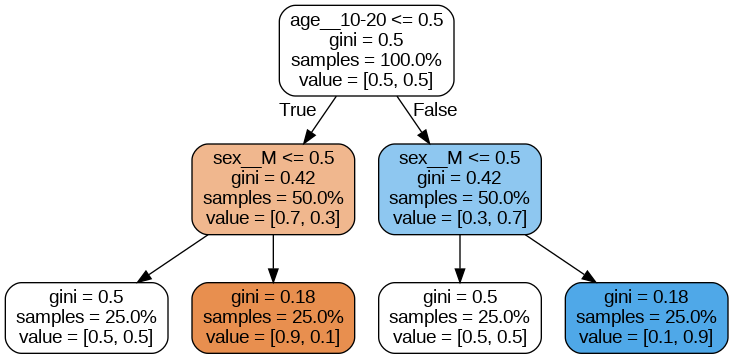

In [50]:
FEATURES = ['sex', 'age']
TARGET = 'target'
WEIGHT = 'num_users'

clf, feature_names = fit_tree(df, FEATURES, TARGET, WEIGHT)
plot_tree(clf, feature_names)